In [ ]:
# 2. Calculate max parameters for:
# CNN with 3 Conv Layers ( with 3x3 cores, stride 2 and padding - same)
# last layers - 100 features, middle  - 200 features, first - 400 features
# initial images have size 200x300 px

In [ ]:
# 3. What to do if in process you have a leak of RAM?

In [ ]:
# 9. Build a CNN from zero to hero for MNIST dataset using Keras

In [ ]:
# 10. Use knowledge transfer to build a classifier for CIFAR10 dataset
# - a) create a training dataset with 100 images by class ( month, sea, city, etc) or use from tf.Datasets
# - b) Split it into train and validation parts
# - c) Build initial pipeline with data preparation (resizing, rescaling, augmentations)
# - d) Use a pre-trained model as feature extractor ( MobileNetV2, InceptionV3, etc)
# - e) Add classification head

In [10]:
from tensorflow.keras import datasets, layers, models, callbacks, optimizers
import tensorflow_datasets as tfds

In [3]:
# let's download cassava dataset from tfds
cassava_ds, cassava_info = tfds.load('cassava', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\username\tensorflow_datasets\cassava\incomplete.IBC545_0.1.0\cassava-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\username\tensorflow_datasets\cassava\incomplete.IBC545_0.1.0\cassava-test.tfrecord*...:   0…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\username\tensorflow_datasets\cassava\incomplete.IBC545_0.1.0\cassava-validation.tfrecord*..…

Dataset cassava downloaded and prepared to C:\Users\username\tensorflow_datasets\cassava\0.1.0. Subsequent calls will reuse this data.


In [4]:
cassava_info

tfds.core.DatasetInfo(
    name='cassava',
    full_name='cassava/0.1.0',
    description="""
    Cassava consists of leaf images for the cassava plant depicting healthy and
    four (4) disease conditions; Cassava Mosaic Disease (CMD), Cassava Bacterial
    Blight (CBB), Cassava Greem Mite (CGM) and Cassava Brown Streak Disease (CBSD).
    Dataset consists of a total of 9430 labelled images.
    The 9430 labelled images are split into a training set (5656), a test set(1885)
    and a validation set (1889). The number of images per class are unbalanced with
    the two disease classes CMD and CBSD having 72% of the images.
    """,
    homepage='https://www.kaggle.com/c/cassava-disease/overview',
    data_dir='C:\\Users\\username\\tensorflow_datasets\\cassava\\0.1.0',
    file_format=tfrecord,
    download_size=1.26 GiB,
    dataset_size=1.26 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=strin

In [24]:
train, test, valid = cassava_ds['train'], cassava_ds['test'], cassava_ds['validation']

In [20]:
one_image_tf, one_label_tf = next(iter(train))
one_image = one_image_tf.numpy()
one_label = one_label_tf.numpy()


In [21]:
one_image.shape

(500, 666, 3)

Text(0.5, 1.0, 'Label: 3')

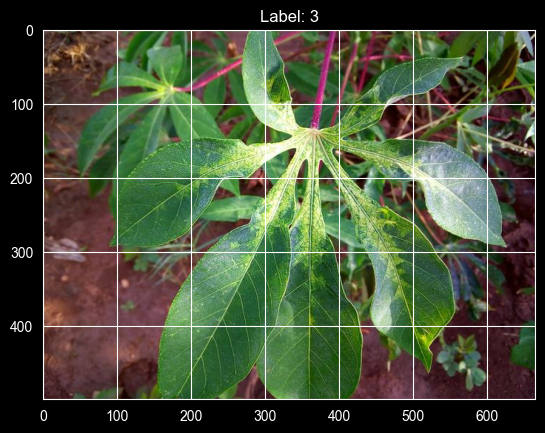

In [19]:
# let's visualize one image
import matplotlib.pyplot as plt

plt.imshow(one_image)
plt.title(f'Label: {one_label}')

In [27]:
num_classes = cassava_info.features['label'].num_classes  # Cassava has 5 classes

model = models.Sequential(
    [
        layers.InputLayer(shape=(None, None, 3)),
        layers.Conv2D(64, 7, activation="relu",padding='same'),
        layers.MaxPooling2D(2),
        layers.Conv2D(128, 3, activation="relu", padding='same'),
        layers.Conv2D(128, 3, activation="relu", padding='same'),
        layers.MaxPooling2D(2),
        layers.Conv2D(256, 3, activation="relu", padding='same'),
        layers.Conv2D(256, 3, activation="relu", padding='same'),
        layers.MaxPooling2D(2),
        layers.Flatten(),
        layers.BatchNormalization(),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(64, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model.compile(optimizer=optimizers.Adam(learning_rate=5e-3, epsilon=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              )


ValueError: Shapes used to initialize variables must be fully-defined (no `None` dimensions). Received: shape=(None,) for variable path='sequential_3/batch_normalization_9/gamma'

In [25]:
history = model.fit(
    train,
    batch_size=512,
    validation_data=test,
    epochs=100,
)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1_1/Cast:0", shape=(None, None, 3), dtype=float32). Expected shape (None, 500, 666, 3), but input has incompatible shape (None, None, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, None, 3), dtype=uint8)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

## check link https://www.tensorflow.org/tutorials/generative/style_transfer